# Chocolate Scraping with Beautiful Soup
### After eating chocolate bars your whole life, you’ve decided to go on a quest to find the greatest chocolate bar in the world.

- You’ve found a website that has over 1700 reviews of chocolate bars from all around the world. It’s displayed in the web browser on this page.

### Some questions we thought about when we found this dataset were:

- Where are the best cocao beans grown?
- Which countries produce the highest-rated bars?
- What’s the relationship between cocao solids percentage and rating?

In [1]:
#1 importing libraries
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#2 make a request to this site to get the raw HTML
html_site = 'https://content.codecademy.com/courses/beautifulsoup/cacao/index.html'
html_get = requests.get(html_site)

In [3]:
#3 Create a BeautifulSoup object and 4 exploring
html_webpage = html_get.content
soup = BeautifulSoup(html_webpage, 'html.parser')


In [4]:
#5 getting all of the tags that contain the ratings. and 6 creating an empty list called ratings to store all the ratings in.
soup_rating_list = soup.find_all(attrs={'class':'Rating'})
# soup_rating_text = soup_rating_list.get_text()

In [5]:
#7 Looping through the ratings tags and get the text contained in each one and converting the rating to a float
ratings = [float(items.get_text()) for items in soup_rating_list[1:]]
print(ratings[0:5])

[3.75, 2.75, 3.0, 3.5, 3.5]


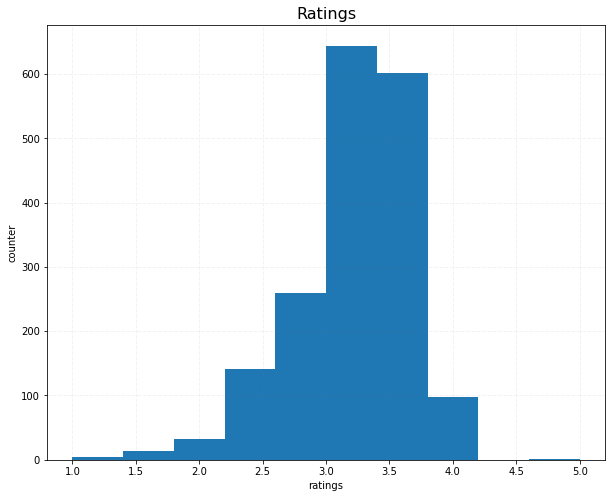

<Figure size 432x288 with 0 Axes>

In [6]:
#8 Using Matplotlib, create a histogram of the ratings values
fig, ax = plt.subplots(figsize=(10, 8))
plt.hist(ratings)
ax.grid(visible=True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
plt.title('Ratings', fontsize=16)
plt.xlabel('ratings')
plt.ylabel('counter')
plt.show()
plt.clf()

In [7]:
#9  we can do a groupby to find the ones with the highest average rating. 
# 10 we now want to make an empty list to hold company names. 
# 11 Looping through the tags containing company names, and adding the text from each tag to the list you just created.
companies = [company.get_text() for company in soup.select('.Company')[1:]]
df = pd.DataFrame.from_dict({'company': companies, 'rating': ratings})
print(companies[:10])

['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin']


In [8]:
#12, 13 Creating a DataFrame with a column “Company” corresponding to your companies list, and a column “Ratings”
average_ratings = df.groupby('company').rating.mean()
best_10 = average_ratings.nlargest(10)
print(best_10)

company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: rating, dtype: float64


In [32]:
#15 wich country have the better cocoa bean?
cocoa_origin = [origin.get_text() for origin in soup.select('.BroadBeanOrigin')[1:]]
df['cocoa_origin'] = cocoa_origin
best_10_cocoa_origin = df.groupby('CocoaOrigin').rating.mean().nlargest(10)

print(best_10_cocoa_origin)

CocoaOrigin
Dom. Rep., Madagascar           4.00
Gre., PNG, Haw., Haiti, Mad     4.00
Guat., D.R., Peru, Mad., PNG    4.00
Peru, Dom. Rep                  4.00
Ven, Bolivia, D.R.              4.00
Venezuela, Java                 4.00
DR, Ecuador, Peru               3.75
Dominican Rep., Bali            3.75
PNG, Vanuatu, Mad               3.75
Peru, Belize                    3.75
Name: rating, dtype: float64


In [11]:
#16 We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better
cocoa_percents = []
cocoa_percent_tags = soup.select('.CocoaPercent')

for each in cocoa_percent_tags[1:]:
  percent = float(each.get_text().strip('%'))
  cocoa_percents.append(percent)

In [12]:
#17 Adding the cocoa percentages as a column called "CocoaPercentage" in the DataFrame that has companies and ratings in it.
df['CocoaPercentage'] = cocoa_percents
print(df.head())

    company  rating CocoaOrigin  CocoaPercentage
0  A. Morin    3.75    Sao Tome             63.0
1  A. Morin    2.75        Togo             70.0
2  A. Morin    3.00        Togo             70.0
3  A. Morin    3.50        Togo             70.0
4  A. Morin    3.50        Peru             70.0


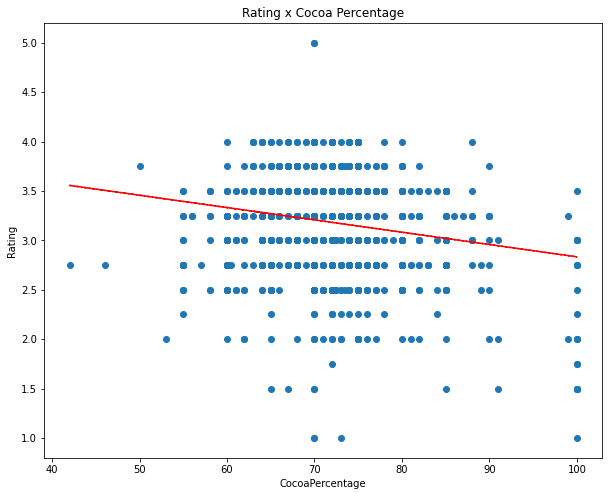

    company  rating CocoaOrigin  CocoaPercentage
0  A. Morin    3.75    Sao Tome             63.0
1  A. Morin    2.75        Togo             70.0
2  A. Morin    3.00        Togo             70.0
3  A. Morin    3.50        Togo             70.0
4  A. Morin    3.50        Peru             70.0


<Figure size 432x288 with 0 Axes>

In [13]:
#18 Making a scatterplot of ratings 
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(df.CocoaPercentage, df.rating)
z = np.polyfit(df.CocoaPercentage, df.rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), 'r--')
plt.title('Rating x Cocoa Percentage')
plt.xlabel('CocoaPercentage')
plt.ylabel('Rating')
plt.show()
plt.clf()

print(df.head())